<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM461/Blackbody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blackbody Radiation

In [50]:
import matplotlib.pyplot as plt #import routines to do plotting. We can reference them as 'plt.'.
import numpy as np #import routines to do numerical computation. Reference them as 'np.'
from scipy.constants import h,c,k #import Planck's constant, the speed of light, and Boltzmann's constant


Here is some blackbody data at 5000 K.

In [51]:
#wavelengths
L=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000] # these are in nanometers

# radiation intensity at each of the wavelengths.
I=[3792016.855901231, 210014418316.7247, 3347072267927.6396, 8743584892994.334, 12107190590398.123, 12762388541757.588, 11811975379645.855, 10242698496748.604, 8595614427497.387, 7101907122824.91, 5832220742176.297, 4786186091722.687, 3937090893290.5522, 3251957302146.7144, 2699645169218.148, 2253523369563.112, 1891844553102.5288, 1597254721178.954, 1356060734772.3047,1157508004287.7666]



Let's plot it in a scatter plot. Matplotlib was imported at the beginning to handle plotting. ```plt.scatter``` will give us a scatter plot. We want to plot Intensity (y-axis) vs wavelength (x-axis) so ```plt.scatter(L,I)``` should give us the plot we're looking for. **Try it in the cell below.**

We can make it fancy by adding stuff inside the parentheses (separated by a comma from what we entered before). Color is changed with ```c=' '``` with a letter inside the ' ' to indicate the color. 'b' is blue, 'r' is red, 'k' is black. Alternatively you can use names like ```c='purple'```.

We can, optionally, change the size of the points using ```s=``` followed by a number. ```s=1``` will give very small points.

You may notice a line of gobbledygook above the plot. This can be eliminated by adding ```plt.show()``` on a new line at the end.

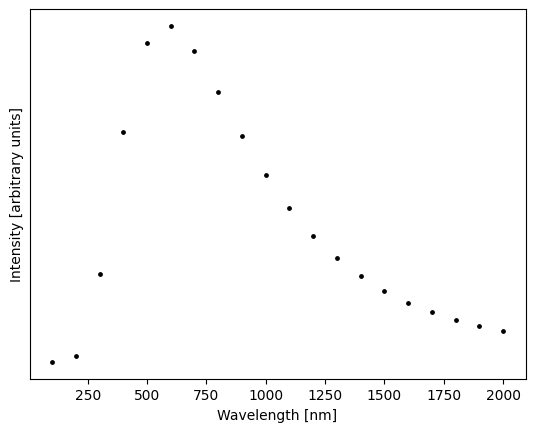

In [58]:
# make scatter plot. *I*ntensity vs wave*L*ength with black size 6 points.
plt.scatter(L,I,c='black',s=6) # c and s define the color and point size. We can leave them off and get default colors and sizes if we want.
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [arbitrary units]')
plt.yticks([])
plt.show()

##Wien approximation
[Wilhelm Wien derived his law](https://en.wikipedia.org/wiki/Wien_approximation) from thermodynamics in 1896 to account for the high energy emission from a glowing object. $$I_{W}=\dfrac{2hc^2}{\lambda^5}e^\frac{-hc}{\lambda k_BT}$$The foundations were the second law of thermodynamics and electromagnetism. This solid basis would seem to make it very reliable.

Let's make a function to plot alongside our blackbody data. We start with ```def``` (for definition) followed by the name of our function and the variables that it depends on and finally a colon. You can name it anything (almost) that you want. Here we'll name our function $W$ for the intensity of emission predicted by Wien's Law.

All lines after this until the end of the function need to be indented two spaces. We can do lots of calculations here but in this case we really just need to return the result of using the Wien law equation using the wavelength and temperature that will be supplied when the function is called.

In python, exponents are accomplished using \** and not ^ as in many other languages. ^ has a meaning but it is not exponent. So $x^2$ should be written as x**2.

In [59]:
# Wien's law
def W(l,T): # Define a Wien function with wavelength and temperature as parameters.
  return 2*h*c**2/l**5*np.exp(-h*c/(l*k*T)) # We can have lots of computations between the 'def' and the 'return' but here we just need to return the result of Wien Equation.
                                            # np.exp() means to find the exponential function in the numpy library we imported above.


So now that we have a function we can determine the Wien intensity at any wavelength and temperature by calling the function


```
W(1000e-9,5000)
```
will determine the intensity (in some units that don't matter to us much) at 1000 nm and 5000 K.




Now let's calculate at a whole bunch of wavelengths and plot them. Since we're plotting an equation we'll use ```plt.plot``` instead of ```plt.scatter```. First we'll generate a whole bunch of wavelength values. Then we'll plot our ```W(λ,T)``` function.

The function expects meters for λ and we can either change the units to nm in the equation or we can make the axis labels nm by multiplying by the λ by a billion inside the plot command.

In [ ]:
# generate x-axis in increments from 1nm to 10 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
T=5000
lamb = np.arange(1e-9, 1e-5, 1e-8)
plt.plot(lamb*1e9,W(lamb,T),'b-') # plot lambda (multiplied by a billion so that the axis is in nm) vs W(λ,5000) and make it blue/lines ('b-')
plt.show()

Let's make it nicer. Adjust the axes, make labels, etc.

Use ```plt.xlim(0,2000)``` to adjust the axis limits.

Use ```plt.xlabel('$\lambda$ [nm]')``` to make a label on the *x*-axis. The ```$\lambda$``` is a form you can use in labels to get Greek letters (as well as lots of other mathematical stuff.

The dollar signs need to surround whatever mathematical stuff you want to output. A couple of other key mathematical things you may want to use include subscripts, _, and superscripts, ^. Again these need to be inside dollar signs.

A similar line can adjust the ylabel to $I_\lambda$.

Add two other plots at other temperatures to the one above. Use 3000 K and 8000 K. And make one red dashed lines ('r--') and the other green dash dotted lines ('g-.'). To add plots just duplicate the plt.plot line above and adjust as needed.

How are the 3000 K, 5000 K, and 8000 K plots different?

Now let's plot the Wein law at 5000 K against the blackbody data we started with. Copy the code from the previous box and add a line to create the scatter plot from above.

To plot the function we defined we need to define a variable for wavelength containing all the values at which we want to evaluate the function. There are several possible ways to generate these.

```np.arange(start, end, step)``` is one way.

```np.linspace(start, end, number of points)``` is another.

```np.logspace(start, end, number of points``` makes sense here because we're going to be plotting over several orders of magnitude.





In [ ]:
# plot scatter plot data
  #insert code line for making the scatter plot from above

# set up axes
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [arbitrary units]')
plt.yticks([])

# plot a Wien's law curve
T=5000
lamb= np.logspace(-9, -4, 100) # this will give us 100 points spread out over 10^-9 to 10^-4 with similar numbers of points at each order of magnitude.
plt.plot(lamb*1e9,W(lamb,T),'b-') # plot lambda (multiplied by a billion so that the axis is in nm) vs W(λ,5000) and make it blue/lines ('b-')

# show everything
plt.show()

Is the fit perfect? If not, where is it best and where is it not so good?

We can plot using a log/log scale. This may be useful to emphasize the differences of the different approaches. We'll also include some more high wavelength data.

Copy the previous plot code here. The added keywords to make a log plot and to adjust the $x$ and $y$ axes are shown.

In [ ]:
L=[   100. ,215.443469,464.15888336,1000.,2154.43469003,4641.58883361 ,10000., 21544.34690032,  46415.88833613, 100000.]
I=[3792016.855901231, 406107817305.2317, 11247796609317.205, 7101907122824.91, 915640363596.9908, 64370096452.65617, 3572081500.9413667, 179574549.27531382, 8643820.23088103, 407981.50284059084]
# redefine the I and L data to extend the plot over a greater wavelength range.

In [ ]:
#plot the data as scatter plot
  #insert scatter plot line here


#plot Wien's law
T=5000
  #insert Wien's law plot line here


#make it a log plot and adjust the axes
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e0,1e14)
plt.xlim(4e1,1e5)
plt.show()

## Rayleigh-Jean's Law
The Wien Law deviates from reality in the high wavelength region. In early 1900, John Strutt (usually known as Lord Rayleigh) came up with a classical derivation of the emission curve that gave the proper wavelength dependence in the low-energy region. In 1905, he and Jeans came up with an equation that we call the [Rayleigh-Jeans](https://en.wikipedia.org/wiki/Rayleigh%E2%80%93Jeans_law) Law.
$$I_{RJ}=\dfrac{2ck_BT}{\lambda^4}$$

In [9]:
# Rayleigh - Jeans law
def R(l,T):
  return 2*c*k*T/l**4

Now let's plot this function along with the Wien Law and data. All that's needed is to copy the previous plot code and add the appropriate command to plot the Rayleigh-Jeans Law on it.

**Modify the box below to include those three plots. **

Since we have several things going on here, it makes sense to be clear about which plot is which. We can make a legend using ```plt.legend()```. If you do that to the previous plot, nothing may change because we haven't set up labels for each plot. We can do that by adding to the plt.plot lines inside the parentheses, for example,   ```,label='Wien Law' ```. **Make a similar change to the label of the Rayleigh-Jean's Law.**

We can make it say Wien's Law if we want but that takes an additional step because the single quote mark means something to the program and we need to tell it that it's just text. Using a \ before the ' tells the system to treat the next character as text. So adding ```,label='Wien\'s Law'``` works as we expect.





In [ ]:
#plot the data
  #insert data and scatter plot command

# set the temperature and the wavelengths
T=5000
lamb = np.logspace(-9, -4,len(L)*20) # logspace rather than linspace makes sense when we're using a log plot.

#plot the Wien function
  #insert plot function call here

#plot the Rayleigh Jeans law
  #insert plot function call here

#make it a log plot, adjust the axes, and show the plot
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e0,1e20)
plt.xlim(4e1,1e5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [arbitrary units]')
plt.legend() #make sure to add "label='something'" to each plot command to populate thet legend
plt.show()






##Ultraviolet catastrophe##
Although the Rayleigh-Jeans law works fine at low energy, its prediction for the emission behavior at high energies suggests a problem. Plotting without the log scale makes this more obvious.

In [ ]:
plt.plot(lamb*1e9,R(lamb,T),'g-',label='Rayleigh-Jean\'s Law') # plot lambda (multiplied by a billion so that the axis is in nm) vs W(λ,5000) and make it blue/lines ('b-')
plt.yticks()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [arbitrary units]')
plt.xlim(0,100000)
plt.ylim(0,1e9)
plt.legend()
plt.show()

What is the consequence of the Rayleigh-Jeans law for emission of high-energy photons from a glowing object? Why is 'ultraviolet catastrophe' an appropriate name for this prediction? Althought the ultraviolet catastrophe is sufficient reason for searching for a new description of emission behavior, the discussion and naming of this effect didn't actually occur until *after* a more complete law was demonstrated by Max Planck. Regardless, the Rayleigh-Jeans law did very nicely fit the data a low energies.



##Planck's Law
So we see that the Wien Law works at the highest energy and the Rayleigh-Jeans Law works at the lowest energy. It would be great to have a single law that covers the spectrum. That's what [Max Planck](https://en.wikipedia.org/wiki/Max_Planck) supplied in late 1900. He did so by making assumptions about the frequencies of the oscillators that are absorbing and emitting the energy observed. His assumption, made without evidence, was that oscillators can vibrate at a specific frequency (or integer multiples of that frequency) but no others. The result is the [Planck Law](https://en.wikipedia.org/wiki/Planck%27s_law).

$$I_P=\dfrac{2hc^2}{\lambda^5}\dfrac{1}{e^{\frac{hc}{\lambda kT}-1}}$$

Write a function, $I_P$, to calculate the Planck blackbody radiation intensity.

In [11]:
# Planck law
def P(l,T):
  return 2*h*c**2/l**5*(np.exp(h*c/l/k/T)-1)**-1

Make a plot identical to the Rayleigh/Jeans/Wien plot except add the Planck law to it.


In [ ]:
#add all the plot commands here




#make it a log plot and adjust the axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [arbitrary units]')
plt.ylim(1e4,1e20)
plt.xlim(4e1,1e5)
plt.legend()
plt.show()

Planck's requirement that the energy of oscillators is fixed at $E=h\nu$ was a something of a last-minute guess that he needed in order to patch up his theory after finding out just hours before a presentation of that theory that new data contradicted his previous attempt.  He didn't know why it worked and he assumed there would be a forthcoming classical explanation that would make it all make sense. We're still waiting.